In [6]:
import pandas as pd
from data import constants
from mathutil import comp, percentage, analyze
from plotutil import stackedbar


In [7]:

df = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining\Results.xlsx")
df.fillna("", inplace=True)
dataset = df.loc[(df["Type"] == "Corrole") & (df["Class"] == "Corrole") & (df["Metal"] != "Cu")]
# dataset = df.loc[(df["Type"] !=  "Porphyrin")]
dataset.reset_index(drop=True, inplace=True)
dataset = percentage.createPercData(dataset)
dataset = comp.createCompData(dataset)
dataset = percentage.createCompPercData(dataset)
dataset["dominant"] = dataset[constants.compColumns].idxmax(axis=1)
len(dataset)

C:\Users\jenso\AppData\Local\Temp/ipykernel_10152/3491929193.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["dominant"] = dataset[constants.compColumns].idxmax(axis=1)


774

In [8]:
from matplotlib import pyplot as plt
from plotutil.misc import cm_to_inch
! pip install SciencePlots


In [9]:
plt.style.use(['science', 'nature', 'no-latex'])
plt.rcParams["figure.figsize"] = (cm_to_inch(16), cm_to_inch(13))
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["axes.titlesize"] = 9
plt.rcParams["xtick.labelsize"] = 9
plt.rcParams["ytick.labelsize"] = 9
plt.rcParams["font.family"] = "Arial"


(<Figure size 7559.06x6141.73 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\it{Anzahl}$ $\\it{Strukturen}$'}, xlabel='$\\mathregular{D_{oop}}$ /Å'>)

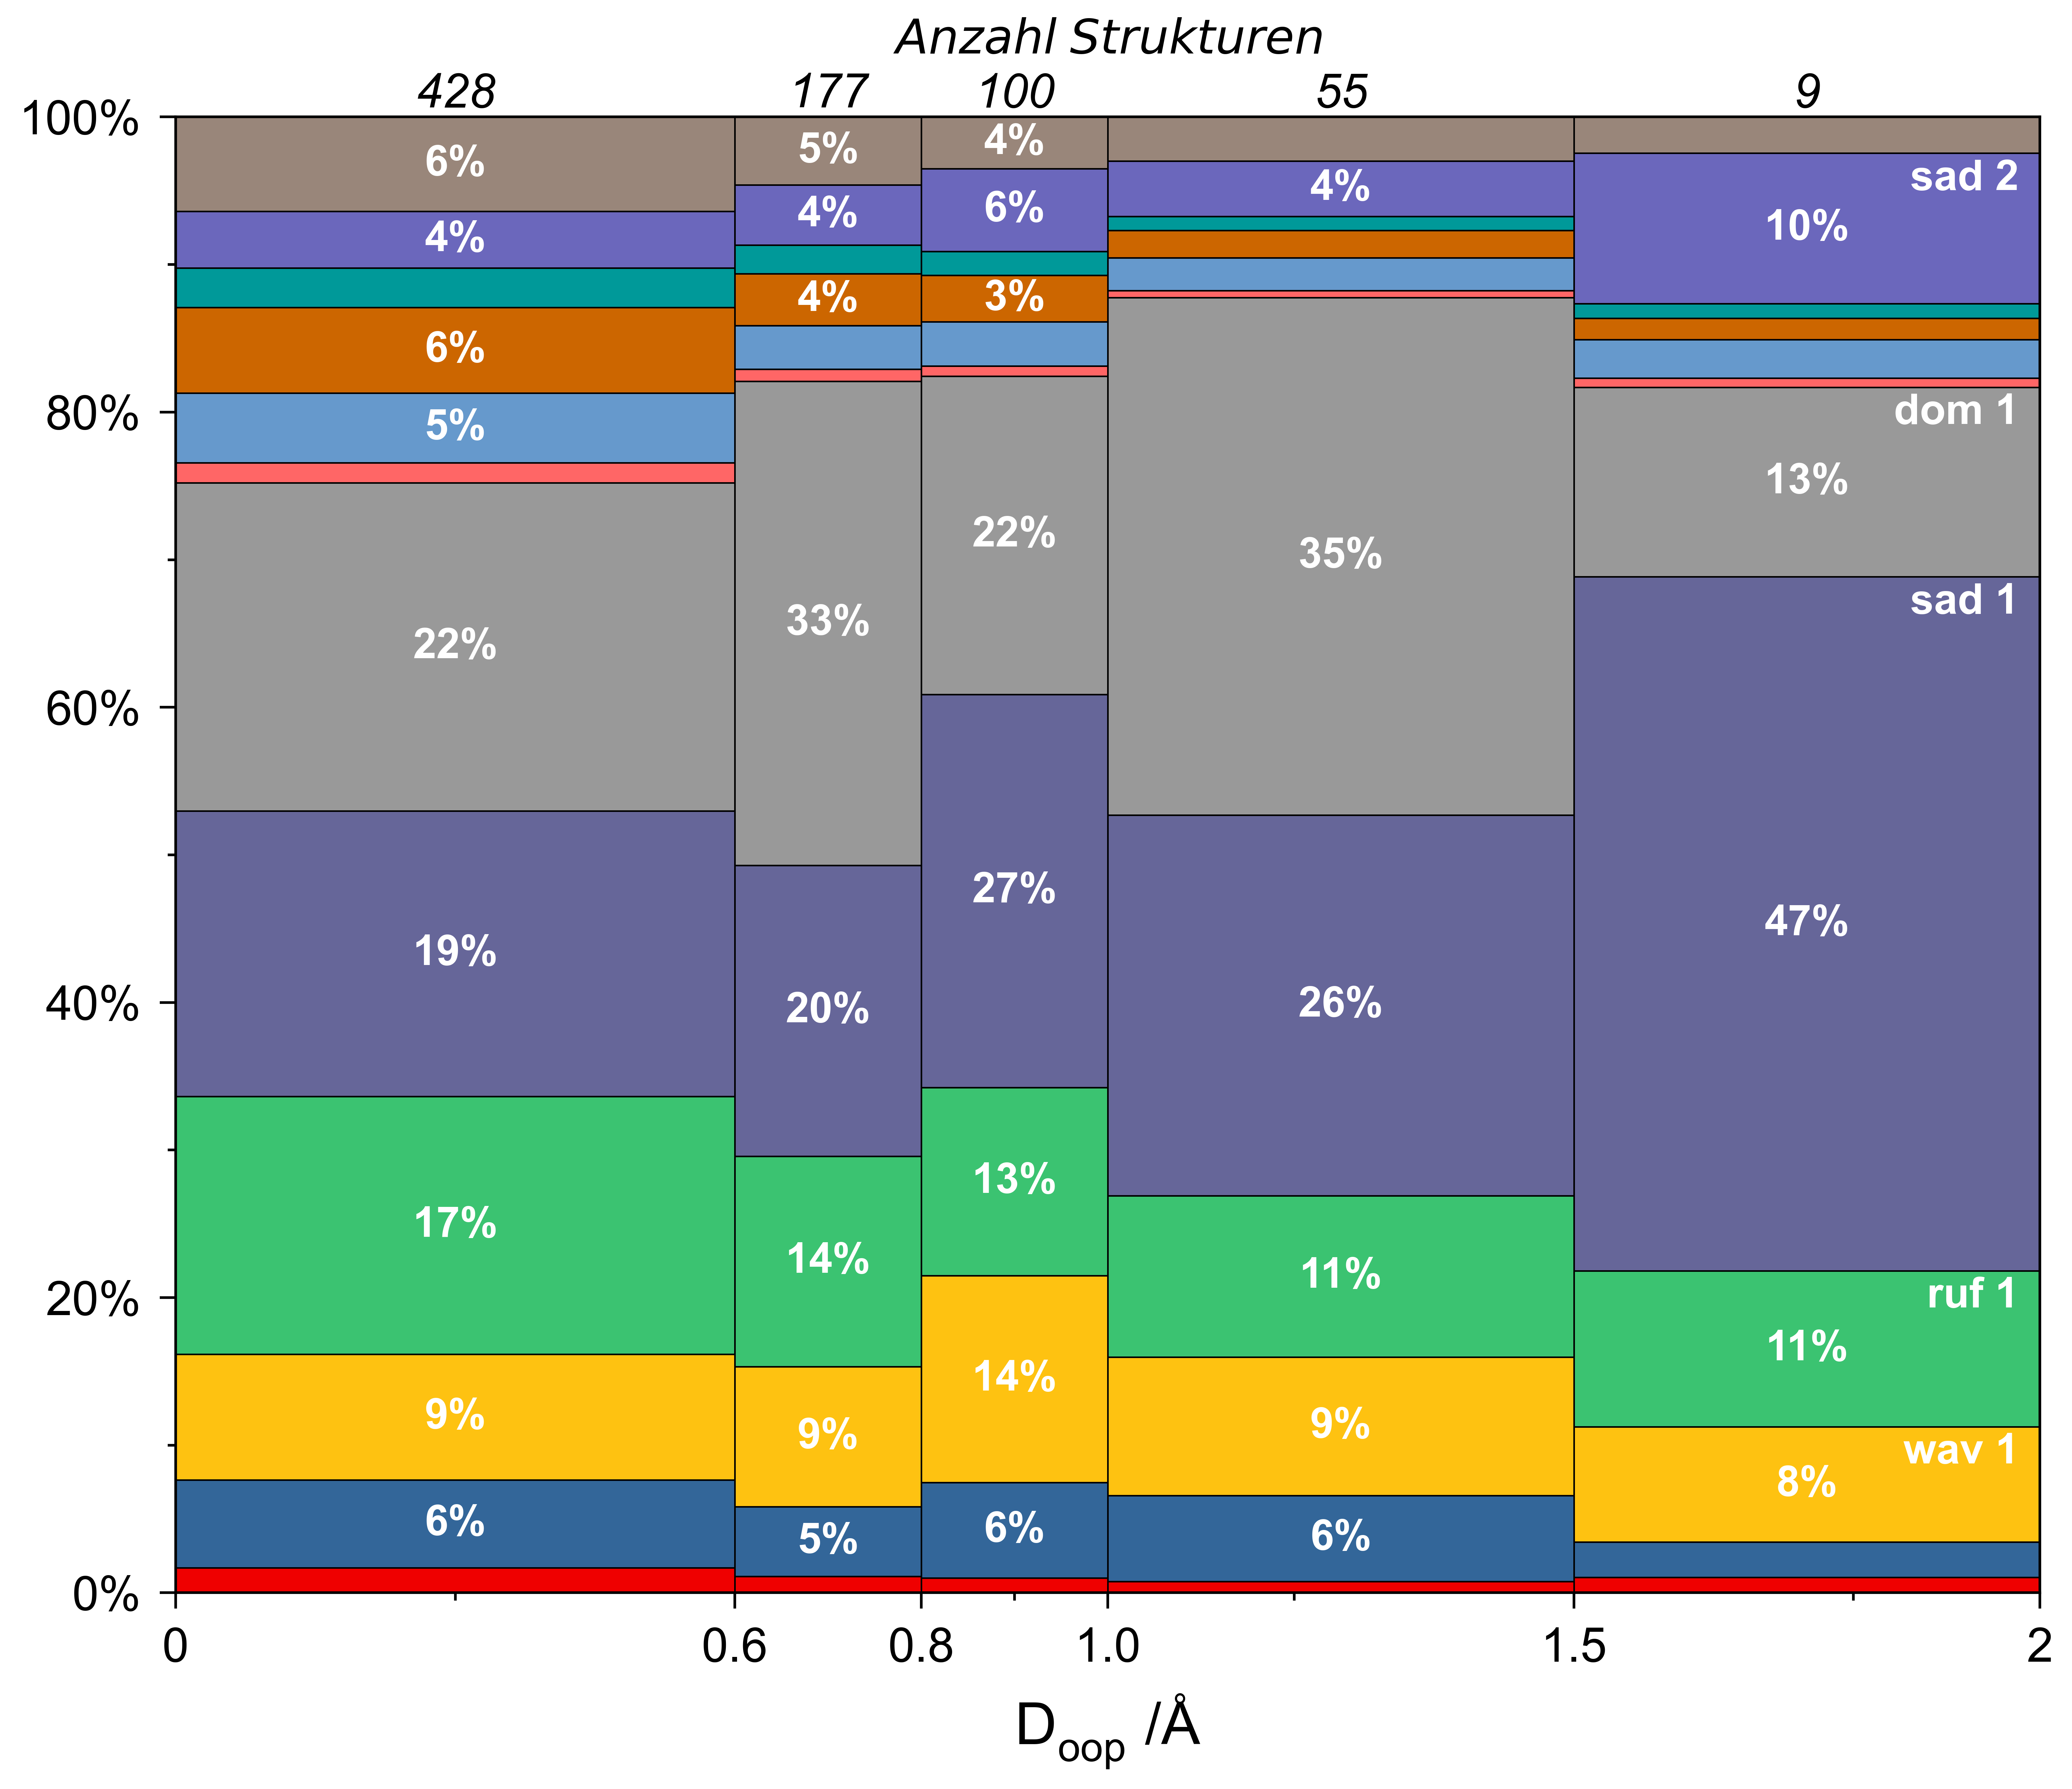

In [10]:
range = [.6, .8, 1., 1.5, 2, 1000]
cols = constants.percColumns
bins = analyze.fieldAnalysis(dataset, range, cols, "DoopExp")
stackedbar.plot_doop(bins, range, cols)